## Introduction

Well, this is my first regression here in kaggle, so don't hesitate to comment something that can be improved, you are going to make a guy more happy :D. And if this notebook can be useful for you give a upset in this notebook or in the dataset.

The idea here is propose a model that explain the house value, my idea first is to prepare a linear model to see how each variable explain the price, so let's get the job. Important! I'm using 5% significance level.

There are 14 attributes in each case of the dataset (thanks @Bhuvana Raj). They are:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \\$10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in \\$1000's

## Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats
from math import log
import seaborn as sns
import statistics  as sts
import statsmodels.api as sm
from statsmodels.api import OLS

## Exploring the data

In [2]:
data = pd.read_csv('../input/boston-housing-dataset/HousingData.csv')

y = data.MEDV
x = data.drop(columns = 'MEDV')

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking the dependent variable

Well, the linear regression suposes that Y is explained by a normal distribution so i will check with shapiro test and let's see a histogram of Y.

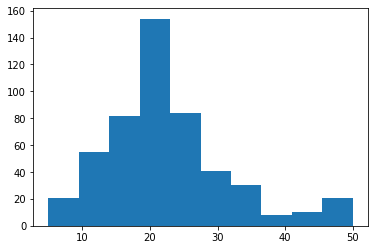

ShapiroResult(statistic=0.9171748757362366, pvalue=4.940195786292171e-16)

In [4]:
plt.hist(y)
plt.show() 

shapiro_test = stats.shapiro(y)
shapiro_test

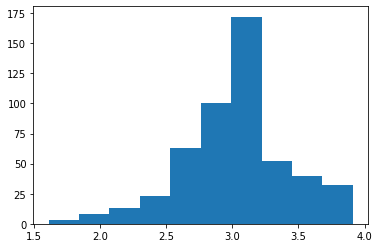

ShapiroResult(statistic=0.9757387638092041, pvalue=1.9355394442754914e-07)

In [5]:
inv_Y = y.apply(log)

plt.hist(inv_Y)
plt.show() 

shapiro_test = stats.shapiro(inv_Y)
shapiro_test


Ok, i have already adjust Y to a variable that can be explained by a normal

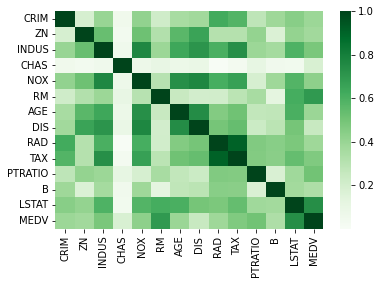

In [6]:
corr = abs(data.corr())

sns.heatmap(corr, cmap = 'Greens'); 

Here we can se that MEDV is strongly correlated with LSTAT and RM.

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

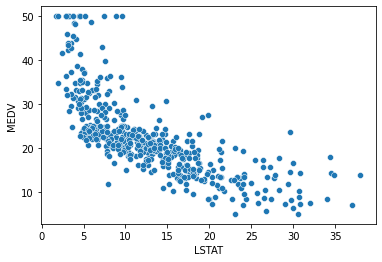

In [7]:
sns.scatterplot(x="LSTAT",y="MEDV",data=data)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

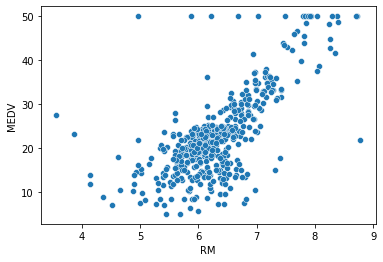

In [8]:
sns.scatterplot(x="RM",y="MEDV",data=data)

## Cleaning missing data

In [9]:
#contamos valores NAN
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
median = sts.median(data.CRIM.dropna())
data['CRIM'].fillna(median, inplace=True)

median = sts.median(data.ZN.dropna())
data['ZN'].fillna(median, inplace=True)

median = sts.median(data.INDUS.dropna())
data['INDUS'].fillna(median, inplace=True)

median = sts.median(data.AGE.dropna())
data['AGE'].fillna(median, inplace=True)

median = sts.median(data.LSTAT.dropna())
data['LSTAT'].fillna(median, inplace=True)


### CHAS variable

Chas is a dummy variable so i choose to replace NaN with the most appeared value. So i will replace the NaN values with 0

In [11]:
data.groupby(['CHAS']).size()

CHAS
0.0    452
1.0     34
dtype: int64

In [12]:
minimum = min(data.CHAS.dropna())
data['CHAS'].fillna(minimum, inplace=True)

In [13]:
#contamos valores NAN
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now that we don't have missing data anymore, let's change the categorical variables in pandas to use in model.

In [14]:
data.CHAS = data.CHAS.astype('category')

data.RAD = data.RAD.astype('category')

y = data.MEDV
x = data.drop(columns = 'MEDV')

## Modeling

In [15]:
model = sm.OLS(y,x)
model = model.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              873.0
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:45:28   Log-Likelihood:                         -1528.8
No. Observations:                 506   AIC:                                      3084.
Df Residuals:                     493   BIC:                                      3139.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0945      0.034     -2.784      0.006      -0.161      -0.028
ZN             0.0444      0.014      3.143      0.002       0.017       0.072
INDUS         -0.0463      0.063     -0.731      0.465      -0.171       0.078
CHAS           3.1434      0.922      3.408      0.001       1.331       4.956
NOX           -2.8687      3.314     -0.866      0.387      -9.380       3.643
RM             6.0348      0.307     19.683      0.000       5.432       6.637
AGE           -0.0139      0.013     -1.033      0.302      -0.040       0.013
DIS           -0.9800      0.191     -5.135      0.000      -1.355      -0.605
RAD            0.1461      0.067      2.177      0.030       0.014       0.278
TAX           -0.0082      0.004     -2.082      0.038      -0.016      -0.000
PTRATIO       -0.4054      0.111     -3.650      0.000      -0.624      -0.187
B              0.0145      0.003      5.326      0.000       0.009       0.020
LSTAT         -0.3772      0.050     -7.543      0.000      -0.475      -0.279
==============================================================================
Omnibus:                      210.025   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1473.711
Skew:                           1.651   Prob(JB):                         0.00
Kurtosis:                      10.681   Cond. No.                     8.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


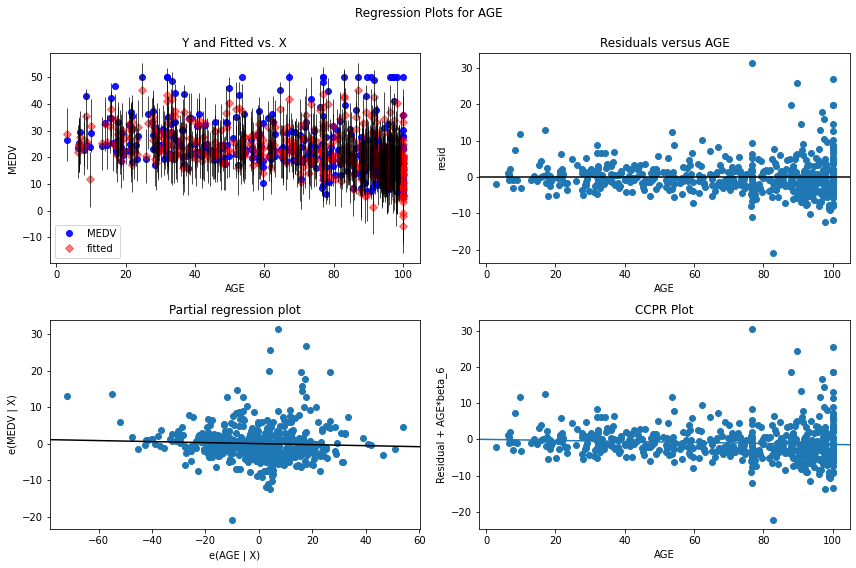

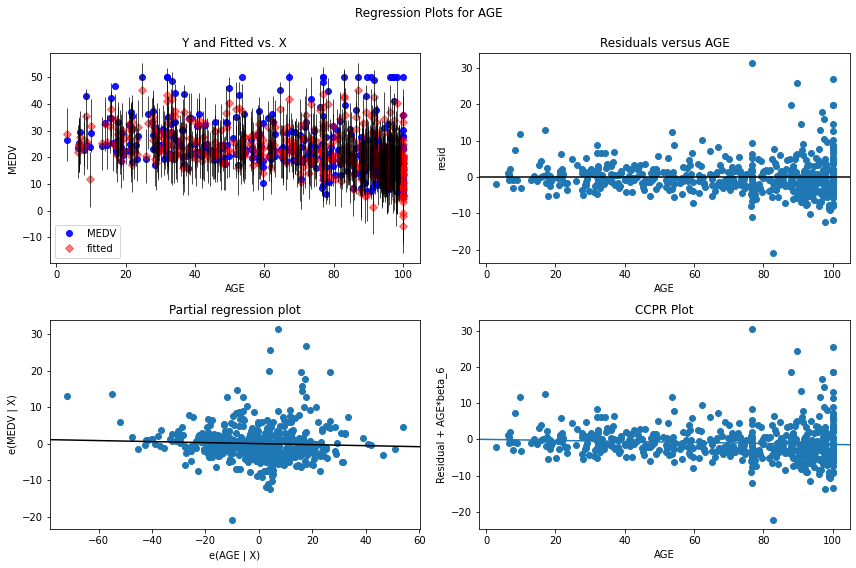

In [17]:
fig = plt.figure(figsize=(12,8))

sm.graphics.plot_regress_exog(model,
                                    'AGE',
                                    fig=fig)


### First model report

Well, here i have some problems. INDUS, NOX and AGE don't pass by the significance level (p-value > 5%) so i remove them in the next model and try again. Now i'll check if something in X is very strongly correlated because it can be a problem too.

<AxesSubplot:>

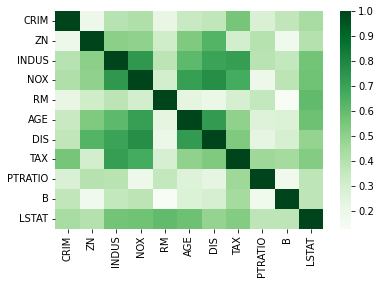

In [18]:
corr = abs(x.corr())
ax= plt.subplot()
sns.heatmap(corr, fmt='g', cmap = 'Greens', ax=ax)

Ok, i don't see something that need treatment so let's maintain the idea of removal non significant variables.

## Removing non significant variables

In [19]:
x1 = x[['CRIM', 'ZN',  'CHAS', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

model = sm.OLS(y,x1)
model = model.fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1133.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:45:30   Log-Likelihood:                         -1530.6
No. Observations:                 506   AIC:                                      3081.
Df Residuals:                     496   BIC:                                      3124.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0930      0.034     -2.739      0.006      -0.160      -0.026
ZN             0.0490      0.014      3.521      0.000       0.022       0.076
CHAS           2.9494      0.915      3.222      0.001       1.151       4.748
RM             5.7821      0.247     23.415      0.000       5.297       6.267
DIS           -0.7941      0.163     -4.879      0.000      -1.114      -0.474
RAD            0.1742      0.064      2.715      0.007       0.048       0.300
TAX           -0.0113      0.003     -3.394      0.001      -0.018      -0.005
PTRATIO       -0.4295      0.110     -3.912      0.000      -0.645      -0.214
B              0.0140      0.003      5.188      0.000       0.009       0.019
LSTAT         -0.4230      0.043     -9.842      0.000      -0.507      -0.339
==============================================================================
Omnibus:                      202.088   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.325
Skew:                           1.605   Prob(JB):                    2.16e-284
Kurtosis:                      10.187   Cond. No.                     2.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2 report

Well, all fo the explanatory variables is significant and the R-squared is really good, so i will see the residual plot and let's check the model.

eval_env: 1


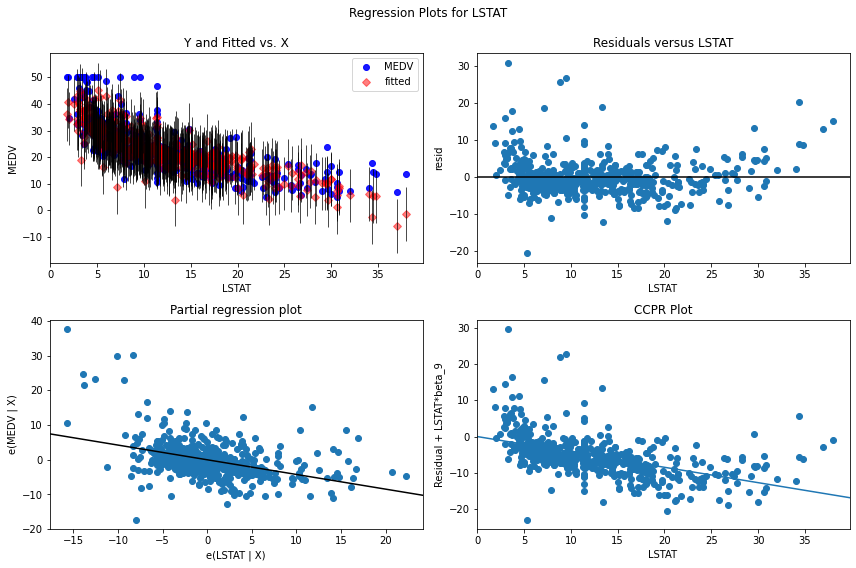

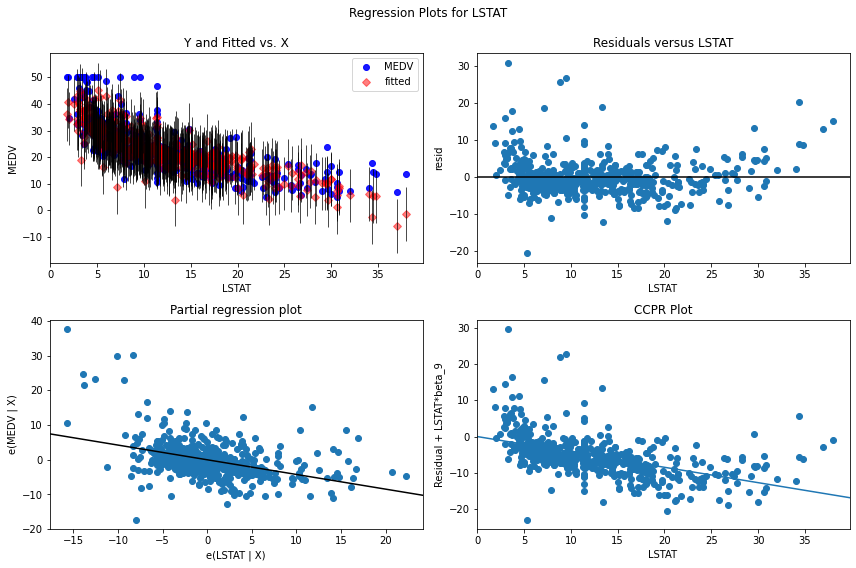

In [21]:
fig = plt.figure(figsize=(12,8))

sm.graphics.plot_regress_exog(model,
                                    'LSTAT',
                                    fig=fig)

## Suggested Model

Well, the equation will be weird because of the tratment in Y, but is next:

$log(MEDV) = -0.09 * CRIM + 0.05 * ZN + 2.95 * CHAS + 5.78 * RM - 0.79 * DIS + 0.17 * RAD - 0.01 * TAX - 0,43 * PTRATIO + 0.01* B - 0.42 * LSTAT$

With this we can see some relations:

- CHAS and RM is something that can really change the price of a house
- INDUS, NOX and AGE was removed so can represent things that people don't consider when buying a house
- One unit in $e^{CHAS}$ affects in 19.10 units in the price of house positively
- One unit in $e^{RM}$ affects in 323.75 units in the price of house positively